In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression

In [2]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

rmse_all = []
R2_all = []
mae_all = []  # 新增：存储所有文件夹的MAE平均值
mape_all = []  # 新增：存储所有文件夹的MAPE平均值

for folder_name in ['best_model_final_0', 'best_model_final_1', 'best_model_final_2']:
    rmse_list = []
    r2_list = []
    mae_list = []  # 新增：存储当前文件夹的MAE列表
    mape_list = []  # 新增：存储当前文件夹的MAPE列表
    
    for k in range(10):
        df = pd.read_csv(folder_name + f'/fold_predictions/fold_{k}_test_predictions.csv')
        predicted_values = np.array(df.loc[:, 'predicted_value'])
        true_values = np.array(df.loc[:, 'true_value'])
        
        # 计算各种指标
        rmse = mean_squared_error(true_values, predicted_values) ** 0.5
        r2 = r2_score(true_values, predicted_values)
        mae = mean_absolute_error(true_values, predicted_values)  # 新增
        mape = mean_absolute_percentage_error(true_values, predicted_values)  # 新增
        
        rmse_list.append(rmse)
        r2_list.append(r2)
        mae_list.append(mae)  # 新增
        mape_list.append(mape)  # 新增

    # 打印每个文件夹的详细结果
    print(f"文件夹: {folder_name}")
    print(f"RMSE列表: {rmse_list}")
    print(f"R2列表: {r2_list}")
    print(f"MAE列表: {mae_list}")  # 新增
    print(f"MAPE列表: {mape_list}")  # 新增
    
    print(f"平均RMSE: {np.mean(rmse_list)}")
    print(f"平均R2: {np.mean(r2_list)}")
    print(f"平均MAE: {np.mean(mae_list)}")  # 新增
    print(f"平均MAPE: {np.mean(mape_list)}")  # 新增
    print("-" * 50)
    
    # 存储平均值
    rmse_all.append(np.mean(rmse_list))
    R2_all.append(np.mean(r2_list))
    mae_all.append(np.mean(mae_list))  # 新增
    mape_all.append(np.mean(mape_list))  # 新增

# 打印最终汇总结果
print("\n所有文件夹的最终平均指标:")
print(f"平均RMSE: {np.mean(rmse_all)}")
print(f"平均R2: {np.mean(R2_all)}")
print(f"平均MAE: {np.mean(mae_all)}")  # 新增
print(f"平均MAPE: {np.mean(mape_all)}")  # 新增

# 可选：打印所有指标的详细汇总
print("\n详细汇总:")
print(f"所有文件夹的RMSE平均值: {rmse_all}")
print(f"所有文件夹的R2平均值: {R2_all}")
print(f"所有文件夹的MAE平均值: {mae_all}")  # 新增
print(f"所有文件夹的MAPE平均值: {mape_all}")  # 新增

文件夹: best_model_final_0
RMSE列表: [52.18663879046306, 38.20511474771576, 45.223041800542795, 87.60238405760445, 64.16869379558655, 36.84686767482211, 73.04955712239841, 85.34461237609, 50.3207265921411, 52.89169475234072]
R2列表: [0.9196173937581411, 0.9560502921691746, 0.9467109959698169, 0.8654810621999544, 0.907439884788284, 0.9791161208391274, 0.8704064253705918, 0.8461509480542492, 0.9266021745836389, 0.9371527654231983]
MAE列表: [37.815356530612256, 26.009493673469386, 28.865220816326534, 41.57928437499999, 38.78981322916667, 26.889352916666667, 44.859402708333334, 40.69570979166667, 33.895109166666664, 33.22031833333333]
MAPE列表: [0.08276551268198974, 0.06279388752292563, 0.07538795141479207, 0.07972380112494572, 0.10549892750364376, 0.06701170808797212, 0.10215963165544613, 0.07895844312107214, 0.10135779927890261, 0.08143935945497016]
平均RMSE: 58.5839331709705
平均R2: 0.9154728063156176
平均MAE: 35.261906154124155
平均MAPE: 0.08370970218466602
-----------------------------------------------

In [3]:
import numpy as np
import pandas as pd

train_data_index = []
train_true_values = []
train_predict_values = []
for k in range(10):
    train_predict_values_fold = []
    for folder_name in ['best_model_final_0', 'best_model_final_1', 'best_model_final_2']:
        df = pd.read_csv(folder_name + f'/fold_predictions/fold_{k}_train_predictions.csv')
        train_predict_values_fold.append(np.array(df.loc[:, 'predicted_value']))

    train_data_index.append(list(df.loc[:, 'original_index']))
    train_true_values.append(np.array(df.loc[:, 'true_value']))
    train_predict_values.append(np.array(train_predict_values_fold).T)

test_data_index = []
test_true_values = []
test_predict_values = []
for k in range(10):
    test_predict_values_fold = []
    for folder_name in ['best_model_final_0', 'best_model_final_1', 'best_model_final_2']:
        df = pd.read_csv(folder_name + f'/fold_predictions/fold_{k}_test_predictions.csv')
        test_predict_values_fold.append(np.array(df.loc[:, 'predicted_value']))

    test_data_index.append(list(df.loc[:, 'original_index']))
    test_true_values.append(np.array(df.loc[:, 'true_value']))
    test_predict_values.append(np.array(test_predict_values_fold).T)


In [4]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# 不同模型预测的平均值作为预测值的评估值结果
rmse_list = []
R2_list = []
mae_list = []
mape_list = []

print("每个fold的评估结果:")
print("-" * 60)
for k in range(10):
    test_predict = np.mean(test_predict_values[k], axis=1)
    test_value = test_true_values[k]
    
    rmse = mean_squared_error(test_value, test_predict) ** 0.5
    R2 = r2_score(test_value, test_predict)
    mae = mean_absolute_error(test_value, test_predict)
    mape = mean_absolute_percentage_error(test_value, test_predict)
    
    rmse_list.append(rmse)
    R2_list.append(R2)
    mae_list.append(mae)
    mape_list.append(mape)
    
    print(f"Fold {k}: RMSE={rmse:.4f}, R2={R2:.4f}, MAE={mae:.4f}, MAPE={mape:.4f}")

print("-" * 60)
print("\n汇总结果:")
print(f"RMSE列表: {[f'{x:.4f}' for x in rmse_list]}")
print(f"R2列表: {[f'{x:.4f}' for x in R2_list]}")
print(f"MAE列表: {[f'{x:.4f}' for x in mae_list]}")
print(f"MAPE列表: {[f'{x:.4f}' for x in mape_list]}")

print("\n平均值 ± 标准差:")
print(f"平均RMSE: {np.mean(rmse_list):.4f} ± {np.std(rmse_list):.4f}")
print(f"平均R2: {np.mean(R2_list):.4f} ± {np.std(R2_list):.4f}")
print(f"平均MAE: {np.mean(mae_list):.4f} ± {np.std(mae_list):.4f}")
print(f"平均MAPE: {np.mean(mape_list):.4f} ± {np.std(mape_list):.4f}")

每个fold的评估结果:
------------------------------------------------------------
Fold 0: RMSE=52.0222, R2=0.9201, MAE=37.1436, MAPE=0.0828
Fold 1: RMSE=39.5469, R2=0.9529, MAE=26.3031, MAPE=0.0644
Fold 2: RMSE=44.0208, R2=0.9495, MAE=29.0602, MAPE=0.0758
Fold 3: RMSE=89.8195, R2=0.8586, MAE=43.0003, MAPE=0.0806
Fold 4: RMSE=60.3041, R2=0.9183, MAE=37.3710, MAPE=0.0972
Fold 5: RMSE=37.1541, R2=0.9788, MAE=27.1385, MAPE=0.0693
Fold 6: RMSE=71.9774, R2=0.8742, MAE=44.3536, MAPE=0.0998
Fold 7: RMSE=85.8574, R2=0.8443, MAE=40.9116, MAPE=0.0791
Fold 8: RMSE=47.2871, R2=0.9352, MAE=31.1524, MAPE=0.0937
Fold 9: RMSE=53.1932, R2=0.9364, MAE=33.5712, MAPE=0.0828
------------------------------------------------------------

汇总结果:
RMSE列表: ['52.0222', '39.5469', '44.0208', '89.8195', '60.3041', '37.1541', '71.9774', '85.8574', '47.2871', '53.1932']
R2列表: ['0.9201', '0.9529', '0.9495', '0.8586', '0.9183', '0.9788', '0.8742', '0.8443', '0.9352', '0.9364']
MAE列表: ['37.1436', '26.3031', '29.0602', '43.0003', 

In [ ]:
df = pd.read_csv('..//data//HEAs_hardness_Data.csv',index_col = 0)
df.columns[18:-1]
comp_data = np.array(df.iloc[:, 18:-1])
# comp_data[test_data_index[0]]

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error  # 添加mae和mape
from sklearn.linear_model import LinearRegression

def model_evaluation_ten_fold(train_true_values, train_predict_values, test_true_values, test_predict_values, model, plot = False):

    # 存储每次验证的结果
    rmse_scores = []
    r2_scores = []
    mae_scores = []  # 新增：存储MAE
    mape_scores = []  # 新增：存储MAPE
    all_true_values = []
    all_pred_values = []

    # 进行十折交叉验证
    for fold_index in range(10):
        
        X_train, X_test = train_predict_values[fold_index], test_predict_values[fold_index]
        y_train, y_test = train_true_values[fold_index], test_true_values[fold_index]

        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()

        # 拟合并转换数据
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        import copy
        model_ = copy.copy(model)
        model_.fit(X_train, y_train)
        
        # 预测
        y_pred = model_.predict(X_test)
        
        # 计算各个评估指标
        rmse = mean_squared_error(y_test, y_pred) ** 0.5
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)  # 新增
        mape = mean_absolute_percentage_error(y_test, y_pred)  # 新增
        
        rmse_scores.append(rmse)
        r2_scores.append(r2)
        mae_scores.append(mae)  # 新增
        mape_scores.append(mape)  # 新增
        
        # 存储真实值和预测值
        all_true_values.extend(y_test)
        all_pred_values.extend(y_pred)
    
    # 计算平均指标
    average_rmse = np.mean(rmse_scores)
    average_r2 = np.mean(r2_scores)
    average_mae = np.mean(mae_scores)  # 新增
    average_mape = np.mean(mape_scores)  # 新增

    if plot:
        # 绘制所有数据的预测值与真实值的对比图
        plt.figure(figsize=(8, 6))
        plt.scatter(all_true_values, all_pred_values, color='blue', label='Predicted vs True')
        plt.plot([min(all_true_values), max(all_true_values)], [min(all_true_values), max(all_true_values)], color='red', linestyle='--', label='Ideal')
        plt.xlabel('True Values', fontsize=14)
        plt.ylabel('Predicted Values', fontsize=14)
        plt.legend(fontsize=12)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.legend()
        plt.savefig('Predicted vs True Values in 10-fold Cross-Validation.png', dpi=1200, bbox_inches='tight', pad_inches=0.05)
        plt.show()
    
    # 返回所有平均指标
    return average_rmse, average_r2, average_mae, average_mape

In [7]:
from bayes_opt import BayesianOptimization
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
import numpy as np

def SVR_tiaocan(train_true_values, train_predict_values, test_true_values, test_predict_values, init_points, n_iter):
    def svr_cv(C, gamma, epsilon):
        model = SVR(kernel='rbf', C=C, gamma=gamma, epsilon=epsilon)
        rmse_test, r2_test, mae_test, mape_test = model_evaluation_ten_fold(train_true_values, train_predict_values, test_true_values, test_predict_values, model, plot = False)
        print(f"C: {C}, gamma: {gamma}, epsilon: {epsilon}, RMSE: {rmse_test}, R2: {r2_test}, MAE: {mae_test},  MAPE: {mape_test}")
        return -rmse_test

    # 定义参数搜索范围
    pbounds = {
        'C': (8000, 15000),
        'gamma': (0.001, 5),
        'epsilon': (0.001, 5)
    }
    pbounds = {
        'C': (1000, 100000),
        'gamma': (1, 5),
        'epsilon': (1, 10)
    }
    pbounds = {
        'C': (10000, 50000),
        'gamma': (1, 3),
        'epsilon': (1, 10)
    }

    # 初始化贝叶斯优化器
    optimizer = BayesianOptimization(
        f=svr_cv,
        pbounds=pbounds,
        random_state=1,
        verbose=2  # 关闭输出
    )

    # 运行优化
    optimizer.maximize(
        init_points=init_points,
        n_iter=n_iter,
    )

    # 获取最优参数
    best_params = optimizer.max['params']
    best_rmse = -optimizer.max['target']

    print(f"最优参数: C={best_params['C']}, gamma={best_params['gamma']}, epsilon={best_params['epsilon']}, 最优 RMSE: {best_rmse}")
    svr = SVR(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'], epsilon=best_params['epsilon'])
    return svr

In [8]:
model = SVR_tiaocan(train_true_values, train_predict_values, test_true_values, test_predict_values, 30, 50)

|   iter    |  target   |     C     |   gamma   |  epsilon  |
-------------------------------------------------------------
C: 26680.88018810296, gamma: 2.440648986884316, epsilon: 1.001029373356104, RMSE: 58.05026714598925, R2: 0.9175818035054067, MAE: 34.82881215235622,  MAPE: 0.0824224060354238
| 1         | -58.05026 | 26680.880 | 2.4406489 | 1.0010293 |
C: 22093.30290527359, gamma: 1.293511781634226, epsilon: 1.8310473529191802, RMSE: 57.91251784140208, R2: 0.9175126084841633, MAE: 34.86118591554977,  MAPE: 0.08267736735703388
| 2         | -57.91251 | 22093.302 | 1.2935117 | 1.8310473 |
C: 17450.408455106837, gamma: 1.6911214540860955, epsilon: 4.570907268076029, RMSE: 57.96109199361363, R2: 0.9175210260923526, MAE: 34.848366271794646,  MAPE: 0.08225861068058106
| 3         | -57.96109 | 17450.408 | 1.6911214 | 4.5709072 |
C: 31552.669360134278, gamma: 1.8383890288065896, epsilon: 7.166975503570836, RMSE: 58.285474278585255, R2: 0.9167121546511583, MAE: 35.01118757757764,  MAPE: 

In [9]:
# pbounds = {
#     'C': (10000, 50000),
#     'gamma': (1, 3),
#     'epsilon': (1, 10)
# }

# 最优参数: C=36817.847003558825, gamma=1.6987269340724969, epsilon=5.434427346195857, 最优 RMSE: 57.60496684768225

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3840\2564128685.py:149: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=3.0)


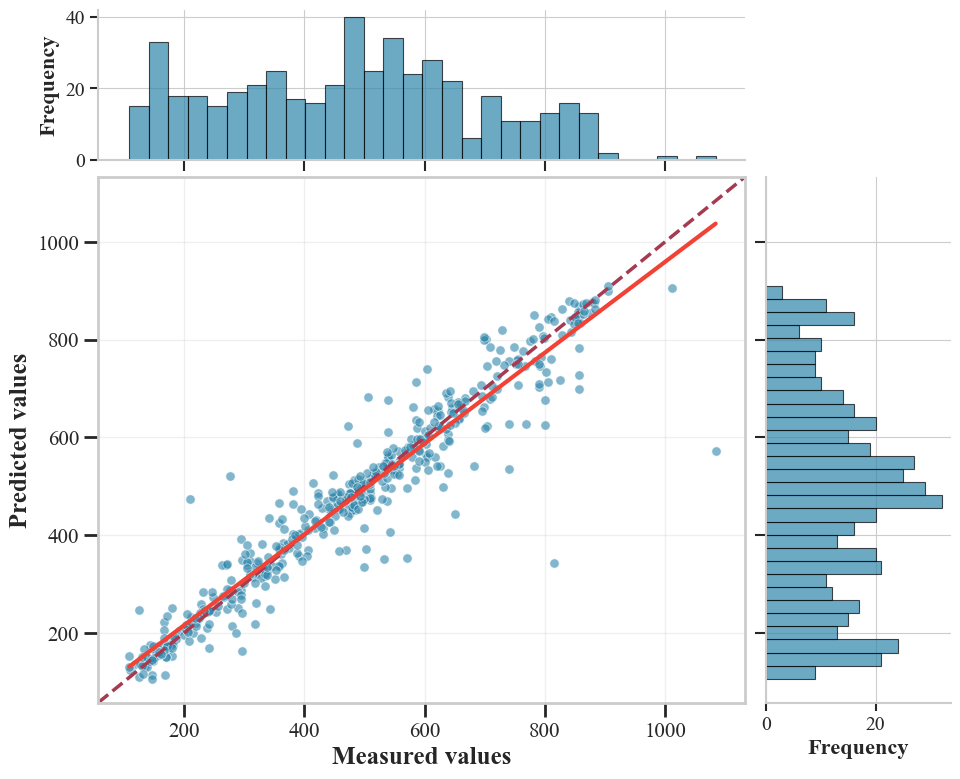


CROSS-VALIDATION PERFORMANCE STATISTICS
Number of samples: 483
Average R-squared (R²): 0.9185
Average RMSE: 57.6050
Average MAE: 34.5814
Average MAPE: 0.0816
Overall Pearson r: 0.9591
Regression slope: 0.9294


In [8]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from scipy import stats

model = SVR(kernel='rbf', C=36817.847003558825, gamma=1.6987269340724969, epsilon=5.434427346195857)

# 存储每次验证的结果
rmse_scores = []
r2_scores = []
mae_scores = []
mape_scores = []
all_true_values = []
all_pred_values = []

# 进行十折交叉验证
for fold_index in range(10):
    X_train, X_test = train_predict_values[fold_index], test_predict_values[fold_index]
    y_train, y_test = train_true_values[fold_index], test_true_values[fold_index]
    
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    
    # 拟合并转换数据
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    import copy
    model_ = copy.copy(model)
    model_.fit(X_train, y_train)
    
    # 预测
    y_pred = model_.predict(X_test)
    
    # 计算各个评估指标
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    rmse_scores.append(rmse)
    r2_scores.append(r2)
    mae_scores.append(mae)
    mape_scores.append(mape)
    
    # 存储真实值和预测值
    all_true_values.extend(y_test)
    all_pred_values.extend(y_pred)

# 计算平均指标
average_rmse = np.mean(rmse_scores)
average_r2 = np.mean(r2_scores)
average_mae = np.mean(mae_scores)
average_mape = np.mean(mape_scores)

# 设置科研绘图风格 - 加大字体和线条
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['axes.linewidth'] = 2.0  # 坐标轴线宽加大
plt.rcParams['axes.labelsize'] = 16   # 坐标轴标签字体加大
plt.rcParams['xtick.labelsize'] = 14  # X轴刻度字体加大
plt.rcParams['ytick.labelsize'] = 14  # Y轴刻度字体加大
plt.rcParams['xtick.major.size'] = 8  # X轴主刻度长度加大
plt.rcParams['ytick.major.size'] = 8  # Y轴主刻度长度加大
plt.rcParams['xtick.major.width'] = 1.5  # X轴主刻度线宽
plt.rcParams['ytick.major.width'] = 1.5  # Y轴主刻度线宽
plt.rcParams['legend.fontsize'] = 12   # 图例字体大小
plt.rcParams['grid.linewidth'] = 0.8   # 网格线宽

# 创建图形和子图布局
fig = plt.figure(figsize=(11, 9))  # 稍微加大图形尺寸
gs = fig.add_gridspec(2, 2, width_ratios=[7, 2], height_ratios=[2, 7],
                      hspace=0.05, wspace=0.05)

# 主散点图
ax_main = fig.add_subplot(gs[1, 0])

# 计算回归线
slope, intercept, r_value, p_value, std_err = stats.linregress(all_true_values, all_pred_values)
regression_line = slope * np.array(all_true_values) + intercept

# 绘制散点图
scatter = ax_main.scatter(all_true_values, all_pred_values, 
                          c='#2E86AB', alpha=0.6, s=45,  # 散点大小加大
                          edgecolors='white', linewidth=0.6)  # 边缘线宽加大

# 绘制理想线（y=x）
min_val = min(min(all_true_values), min(all_pred_values))
max_val = max(max(all_true_values), max(all_pred_values))
margin = 0.05 * (max_val - min_val)
ax_main.plot([min_val - margin, max_val + margin], 
             [min_val - margin, max_val + margin], 
             color='#A63A50', linestyle='--', linewidth=2.5,  # 线条加粗
             zorder=1)  # 确保在散点下方

# 绘制回归线
ax_main.plot(sorted(all_true_values), 
             sorted(regression_line), 
             color='#F24236', linewidth=3.0,  # 回归线加粗
             zorder=1)

# 设置坐标轴
ax_main.set_xlabel('Measured values', fontsize=18, fontweight='bold')  # 加大字体
ax_main.set_ylabel('Predicted values', fontsize=18, fontweight='bold')  # 加大字体
ax_main.set_xlim(min_val - margin, max_val + margin)
ax_main.set_ylim(min_val - margin, max_val + margin)

# 设置刻度
ax_main.tick_params(axis='both', which='major', length=10, width=2.0,  # 刻度加大
                    labelsize=15)  # 刻度标签字体加大

# 设置刻度轴宽度
for spine in ax_main.spines.values():
    spine.set_linewidth(2.0)

# 添加网格
ax_main.grid(True, alpha=0.3, linestyle='-', linewidth=1.0)  # 网格线加粗

# 顶部直方图（真实值分布）
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax_main)
ax_histx.hist(all_true_values, bins=30, color='#2E86AB', 
              alpha=0.7, edgecolor='black', linewidth=0.8)  # 直方图边框加粗
ax_histx.set_ylabel('Frequency', fontsize=16, fontweight='bold')  # 字体加大
ax_histx.tick_params(axis='x', labelbottom=False)
ax_histx.tick_params(axis='y', which='major', labelsize=14, length=6, width=1.5)  # 刻度设置
# 隐藏上、右边框
ax_histx.spines['top'].set_visible(False)
ax_histx.spines['right'].set_visible(False)
ax_histx.spines['left'].set_linewidth(1.5)
ax_histx.spines['bottom'].set_linewidth(1.5)

# 右侧直方图（预测值分布）
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax_main)
ax_histy.hist(all_pred_values, bins=30, color='#2E86AB', 
              orientation='horizontal', alpha=0.7, 
              edgecolor='black', linewidth=0.8)  # 直方图边框加粗
ax_histy.set_xlabel('Frequency', fontsize=16, fontweight='bold')  # 字体加大
ax_histy.tick_params(axis='y', labelleft=False)
ax_histy.tick_params(axis='x', which='major', labelsize=14, length=6, width=1.5)  # 刻度设置
# 隐藏上、右边框
ax_histy.spines['top'].set_visible(False)
ax_histy.spines['right'].set_visible(False)
ax_histy.spines['left'].set_linewidth(1.5)
ax_histy.spines['bottom'].set_linewidth(1.5)

# 调整布局，确保标签不被截断
plt.tight_layout(pad=3.0)

# 保存高质量图像
fig.savefig('CV_Prediction_Performance.png', dpi=600, 
            bbox_inches='tight', pad_inches=0.2)  # 增加边距
# fig.savefig('CV_Prediction_Performance.pdf', format='pdf',
#             bbox_inches='tight', pad_inches=0.2)

plt.show()

# 打印详细统计信息
print("\n" + "="*60)
print("CROSS-VALIDATION PERFORMANCE STATISTICS")
print("="*60)
print(f"Number of samples: {len(all_true_values)}")
print(f"Average R-squared (R²): {average_r2:.4f}")
print(f"Average RMSE: {average_rmse:.4f}")
print(f"Average MAE: {average_mae:.4f}")
print(f"Average MAPE: {average_mape:.4f}")
print(f"Overall Pearson r: {r_value:.4f}")
print(f"Regression slope: {slope:.4f}")
print("="*60)

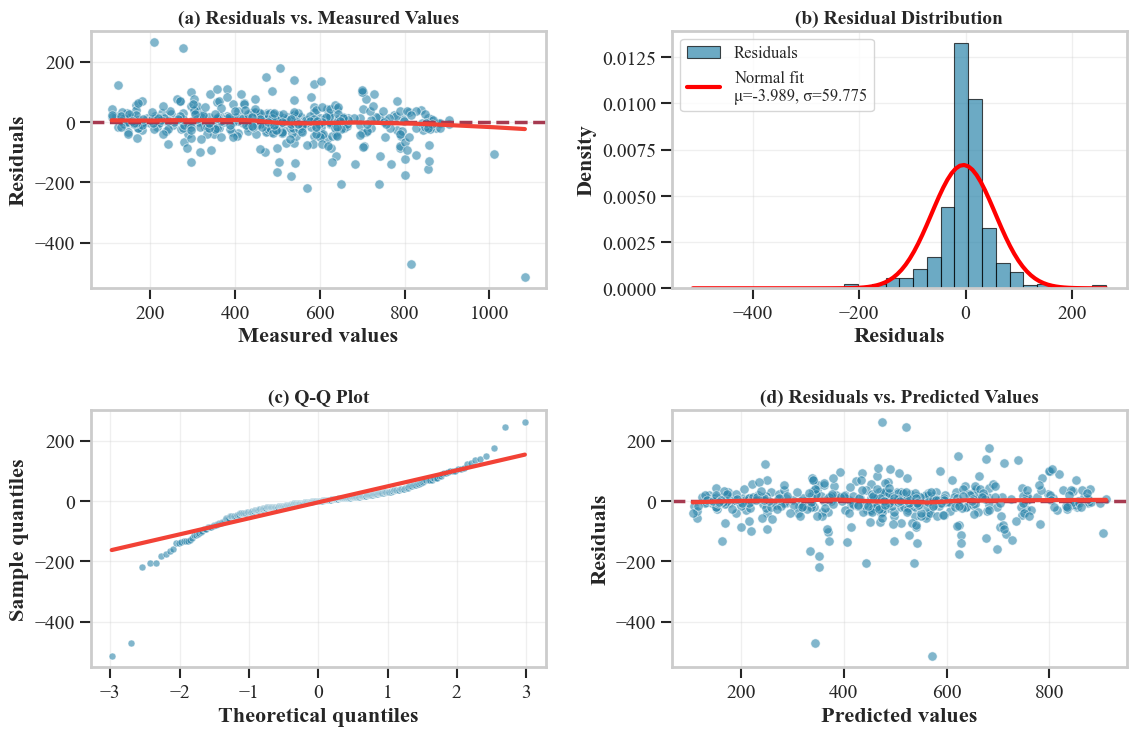


RESIDUAL ANALYSIS STATISTICS
Number of residuals: 483
Mean of residuals: -3.9885
Standard deviation of residuals: 59.7748
Median of residuals: 0.3260
Skewness of residuals: -2.2849
Kurtosis of residuals: 19.8544

Shapiro-Wilk normality test:
  Statistic: 0.7885
  p-value: 1.4727e-24

Anderson-Darling normality test:
  Statistic: 22.6797
  Critical values: [0.571 0.651 0.781 0.911 1.083]
  Significance levels: [15.  10.   5.   2.5  1. ]

D'Agostino's K² normality test:
  Statistic: 308.4481
  p-value: 1.0504e-67

T-test for mean residual = 0:
  t-statistic: -1.4649
  p-value: 1.4359e-01

INTERPRETATION
⚠ Residuals have a slight bias (mean = -3.9885)
⚠ Residuals deviate significantly from normal distribution
⚠ Residuals show some skewness (skewness = -2.2849)
✓ No significant heteroscedasticity detected


In [9]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# 计算残差
residuals = np.array(all_pred_values) - np.array(all_true_values)

# 设置科研绘图风格
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['axes.linewidth'] = 2.0
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['legend.fontsize'] = 12

# 创建图形，使用子图布局
fig = plt.figure(figsize=(12, 8))

# 子图1：残差与真实值的散点图
ax1 = plt.subplot(2, 2, 1)
scatter1 = ax1.scatter(all_true_values, residuals, 
                       c='#2E86AB', alpha=0.6, s=45,
                       edgecolors='white', linewidth=0.6)

# 添加零参考线
ax1.axhline(y=0, color='#A63A50', linestyle='--', linewidth=2.5)

# 计算并添加趋势线（局部加权散点平滑，LOESS）
from statsmodels.nonparametric.smoothers_lowess import lowess
lowess_smooth = lowess(residuals, all_true_values, frac=0.3)
ax1.plot(lowess_smooth[:, 0], lowess_smooth[:, 1], 
         color='#F24236', linewidth=3.0)

ax1.set_xlabel('Measured values', fontsize=16, fontweight='bold')
ax1.set_ylabel('Residuals', fontsize=16, fontweight='bold')
ax1.set_title('(a) Residuals vs. Measured Values', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, linestyle='-', linewidth=1.0)

# 设置坐标轴线宽
for spine in ax1.spines.values():
    spine.set_linewidth(2.0)

# 子图2：残差直方图与正态分布对比
ax2 = plt.subplot(2, 2, 2)

# 绘制残差直方图
n, bins, patches = ax2.hist(residuals, bins=30, density=True, 
                            color='#2E86AB', alpha=0.7, 
                            edgecolor='black', linewidth=0.8,
                            label='Residuals')

# 计算正态分布拟合
mu, sigma = np.mean(residuals), np.std(residuals)
x = np.linspace(min(residuals), max(residuals), 100)
pdf = stats.norm.pdf(x, mu, sigma)

# 绘制拟合的正态分布曲线
ax2.plot(x, pdf, 'r-', linewidth=3.0, 
         label=f'Normal fit\nμ={mu:.3f}, σ={sigma:.3f}')

ax2.set_xlabel('Residuals', fontsize=16, fontweight='bold')
ax2.set_ylabel('Density', fontsize=16, fontweight='bold')
ax2.set_title('(b) Residual Distribution', fontsize=14, fontweight='bold')
ax2.legend(loc='best', frameon=True, fancybox=True)
ax2.grid(True, alpha=0.3, linestyle='-', linewidth=1.0)

for spine in ax2.spines.values():
    spine.set_linewidth(2.0)

# 子图3：Q-Q图（分位数-分位数图）
ax3 = plt.subplot(2, 2, 3)

stats.probplot(residuals, dist="norm", plot=ax3)
ax3.get_lines()[0].set_marker('o')
ax3.get_lines()[0].set_markersize(5)
ax3.get_lines()[0].set_markerfacecolor('#2E86AB')
ax3.get_lines()[0].set_markeredgecolor('white')
ax3.get_lines()[0].set_markeredgewidth(0.5)
ax3.get_lines()[0].set_alpha(0.6)
ax3.get_lines()[1].set_color('#F24236')
ax3.get_lines()[1].set_linewidth(3.0)

ax3.set_xlabel('Theoretical quantiles', fontsize=16, fontweight='bold')
ax3.set_ylabel('Sample quantiles', fontsize=16, fontweight='bold')
ax3.set_title('(c) Q-Q Plot', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3, linestyle='-', linewidth=1.0)

for spine in ax3.spines.values():
    spine.set_linewidth(2.0)

# 子图4：残差与预测值的关系
ax4 = plt.subplot(2, 2, 4)
scatter4 = ax4.scatter(all_pred_values, residuals, 
                       c='#2E86AB', alpha=0.6, s=45,
                       edgecolors='white', linewidth=0.6)

# 添加零参考线
ax4.axhline(y=0, color='#A63A50', linestyle='--', linewidth=2.5)

# 计算并添加趋势线
lowess_smooth_pred = lowess(residuals, all_pred_values, frac=0.3)
ax4.plot(lowess_smooth_pred[:, 0], lowess_smooth_pred[:, 1], 
         color='#F24236', linewidth=3.0)

ax4.set_xlabel('Predicted values', fontsize=16, fontweight='bold')
ax4.set_ylabel('Residuals', fontsize=16, fontweight='bold')
ax4.set_title('(d) Residuals vs. Predicted Values', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3, linestyle='-', linewidth=1.0)

for spine in ax4.spines.values():
    spine.set_linewidth(2.0)

# 调整布局
plt.tight_layout(pad=3.0)

# 保存高质量图像
fig.savefig('Supplementary_Fig_7_Residual_Analysis.png', 
            dpi=600, bbox_inches='tight', pad_inches=0.2)
# fig.savefig('Supplementary_Fig_7_Residual_Analysis.pdf', 
#             format='pdf', bbox_inches='tight', pad_inches=0.2)

plt.show()

# 残差统计分析
print("\n" + "="*60)
print("RESIDUAL ANALYSIS STATISTICS")
print("="*60)
print(f"Number of residuals: {len(residuals)}")
print(f"Mean of residuals: {np.mean(residuals):.4f}")
print(f"Standard deviation of residuals: {np.std(residuals):.4f}")
print(f"Median of residuals: {np.median(residuals):.4f}")
print(f"Skewness of residuals: {stats.skew(residuals):.4f}")
print(f"Kurtosis of residuals: {stats.kurtosis(residuals):.4f}")

# 正态性检验
shapiro_stat, shapiro_p = stats.shapiro(residuals)
print(f"\nShapiro-Wilk normality test:")
print(f"  Statistic: {shapiro_stat:.4f}")
print(f"  p-value: {shapiro_p:.4e}")

# Anderson-Darling 正态性检验
anderson_result = stats.anderson(residuals, dist='norm')
print(f"\nAnderson-Darling normality test:")
print(f"  Statistic: {anderson_result.statistic:.4f}")
print(f"  Critical values: {anderson_result.critical_values}")
print(f"  Significance levels: {anderson_result.significance_level}")

# D'Agostino's K² 正态性检验
k2_stat, k2_p = stats.normaltest(residuals)
print(f"\nD'Agostino's K² normality test:")
print(f"  Statistic: {k2_stat:.4f}")
print(f"  p-value: {k2_p:.4e}")

# 残差均值是否显著不为0的t检验
t_stat, p_value = stats.ttest_1samp(residuals, 0)
print(f"\nT-test for mean residual = 0:")
print(f"  t-statistic: {t_stat:.4f}")
print(f"  p-value: {p_value:.4e}")

# 解释性结论
print(f"\n" + "="*60)
print("INTERPRETATION")
print("="*60)
if abs(np.mean(residuals)) < 0.01:
    print("✓ Residuals are centered around zero (mean ≈ 0)")
else:
    print(f"⚠ Residuals have a slight bias (mean = {np.mean(residuals):.4f})")

if shapiro_p > 0.05:
    print("✓ Residuals appear to follow a normal distribution (p > 0.05)")
else:
    print("⚠ Residuals deviate significantly from normal distribution")

if abs(stats.skew(residuals)) < 0.5:
    print("✓ Residuals are approximately symmetric (|skewness| < 0.5)")
else:
    print(f"⚠ Residuals show some skewness (skewness = {stats.skew(residuals):.4f})")

# 检查异方差性（通过残差与预测值的相关性）
res_pred_corr = np.corrcoef(all_pred_values, residuals)[0, 1]
if abs(res_pred_corr) < 0.1:
    print("✓ No significant heteroscedasticity detected")
else:
    print(f"⚠ Potential heteroscedasticity (correlation = {res_pred_corr:.4f})")

print("="*60)

In [10]:
print(rmse_scores)

[52.945285977991084, 39.539798845833644, 44.94547082739405, 84.15736630635082, 56.726995125870886, 38.89198201801295, 72.31179877198552, 87.02737742075261, 46.032211542704424, 53.4713816399265]
